# Homework 1

For each of the cities presented in the archive:

1. plot Dew point;
2. plot Pressure;
3. calculate Pearson correlation coefficient between Dew Point and Pressure;
4. draw Dew point and Pressure on one plot;
5. normalize[1] each data frame (Dew point and Pressure) and plot on one plot.
 
[1] use feature scaling, i.e. x' = (x - mean(x)) / (max(x) - min(x))

Attribute Information:

* No: row number 
* year: year of data in this row 
* month: month of data in this row 
* day: day of data in this row 
* hour: hour of data in this row 
* season: season of data in this row 
* PM: PM2.5 concentration (ug/m^3) 
* DEWP: Dew Point (Celsius Degree) 
* TEMP: Temperature (Celsius Degree) 
* HUMI: Humidity (%) 
* PRES: Pressure (hPa) 
* cbwd: Combined wind direction 
* Iws: Cumulated wind speed (m/s) 
* precipitation: hourly precipitation (mm) 
* Iprec: Cumulated precipitation (mm)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = [12, 9]

Correlation between Dew Point and Pressure for Beijing: -0.7728710189789821
Correlation between Dew Point and Pressure for Chengdu: -0.7410787709427158
Correlation between Dew Point and Pressure for Guangzhou: -0.0768367239855499
Correlation between Dew Point and Pressure for Shanghai: -0.854530837586842
Correlation between Dew Point and Pressure for Shenyang: -0.7984679067496872


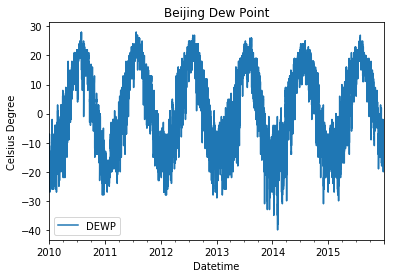

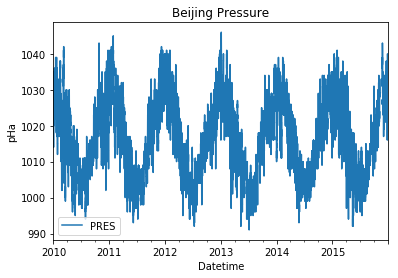

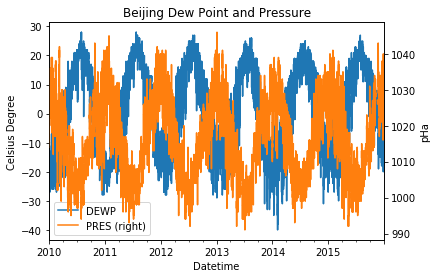

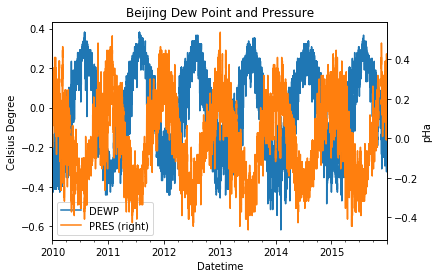

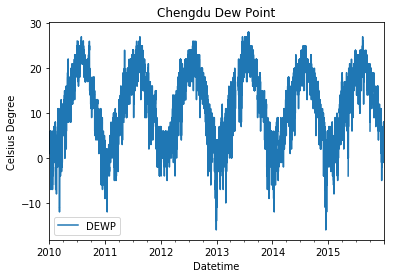

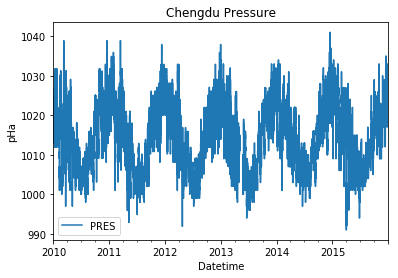

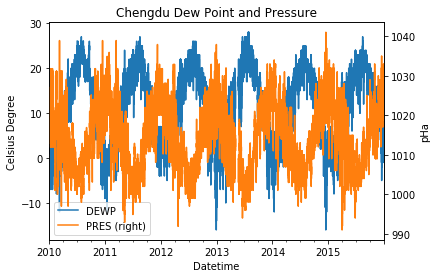

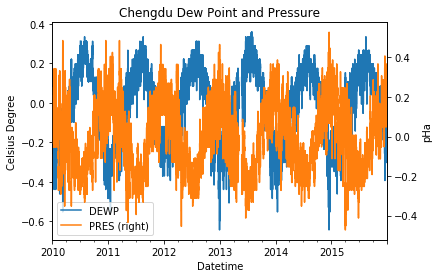

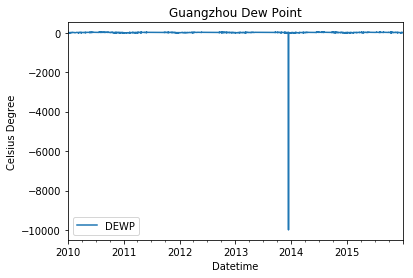

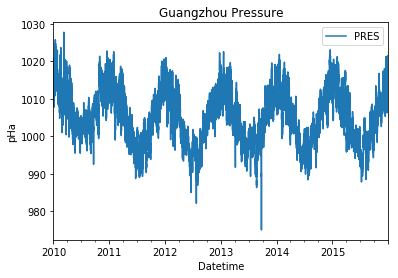

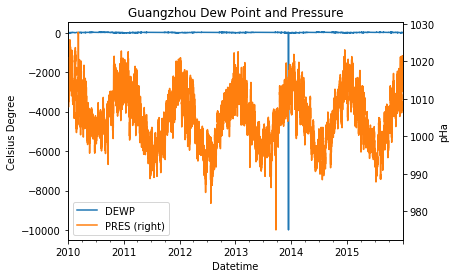

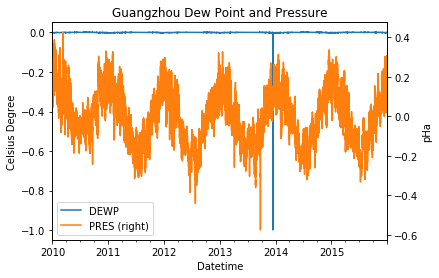

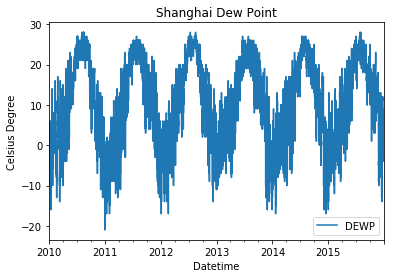

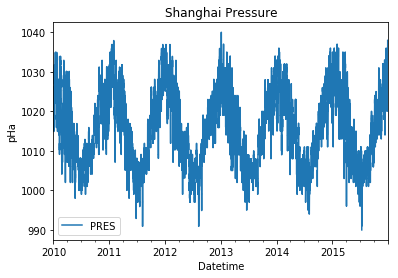

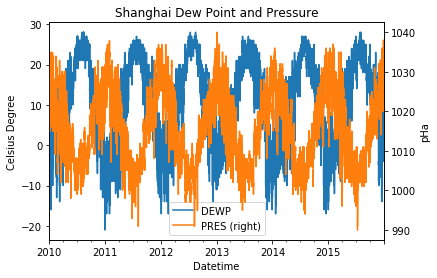

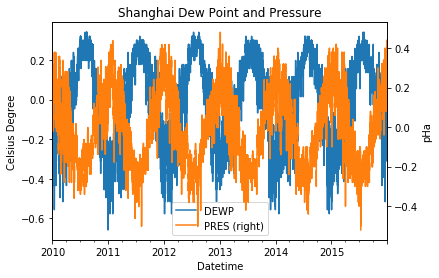

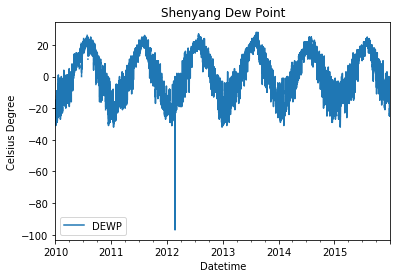

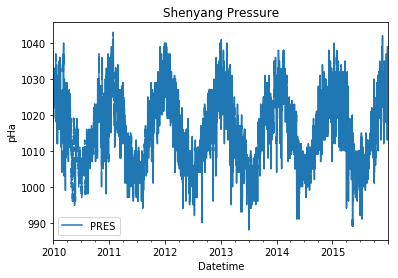

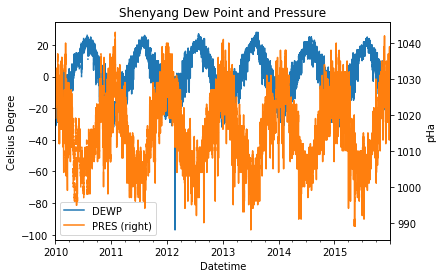

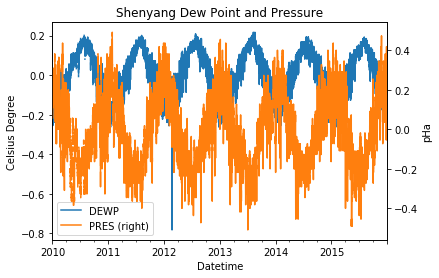

In [2]:
cities = ['Beijing', 'Chengdu', 'Guangzhou', 'Shanghai', 'Shenyang']
files = ['BeijingPM20100101_20151231.csv', 'ChengduPM20100101_20151231.csv', 
         'GuangzhouPM20100101_20151231.csv', 'ShanghaiPM20100101_20151231.csv', 
         'ShenyangPM20100101_20151231.csv']

for city in cities:
    # loading data
    file = city + 'PM20100101_20151231.csv'
    df = pd.read_csv('./data/' + file, index_col=1, 
                     parse_dates={'Datetime': [1, 2, 3, 4]},
                     date_parser=lambda x: pd.datetime.strptime(x, '%Y %m %d %H'))

    # plotting (tasks 1 and 4)
    df.plot(x='Datetime', y='DEWP', title=city + ' Dew Point').set_ylabel('Celsius Degree')
    df.plot(x='Datetime', y='PRES', title=city + ' Pressure').set_ylabel('pHa')

    ax = df.plot(x='Datetime', y=['DEWP', 'PRES'], secondary_y='PRES', 
                            title=city + ' Dew Point and Pressure')
    ax.set_ylabel('Celsius Degree')
    ax.right_ax.set_ylabel('pHa')
    
    # correlation (task 3)
    print('Correlation between Dew Point and Pressure for {}: {}'.format(city, df['DEWP'].corr(df['PRES'])))
    
    # normalization (task 5)
    colums_to_norm = ['DEWP', 'PRES']
    df[colums_to_norm] = df[colums_to_norm].apply(lambda column: (column - column.mean()) / (column.max() - column.min()))
    
    # plotting (task 5)
    ax = df.plot(x='Datetime', y=['DEWP', 'PRES'], secondary_y='PRES', 
                        title=city + ' Dew Point and Pressure')
    ax.set_ylabel('Celsius Degree')
    ax.right_ax.set_ylabel('pHa')